## Vismaya Walawalkar
### EECS 395: Course Project [Dec / 8 / 2017]

#### 1.1 Problem Statement
Comparing efficiency of Policy Gradient Reinforcement Learning with Deep Q Networks to maintain an pendulum-cart system in inverted equilibrium.

#### 1.2 Program Setup
**Packages used:**

1. Keras with Tensorflow backend to implement the Neural Networks
2. CartPole-v1 dynamical system model from OpenAI - gym

**File Map**

1. The learned models are stored in files cartpole_pg.h5 and cartpole1_dqn for Policy Gradient and DQN respectively.
2. The myprep initializes all constants like learning rate, momentum, discount_factor, epsilon and epsilon_decay. It also defines the functions specific to training for each algorithm.
3. The my_policy_gradient.py and my_dqn.py files contain the episodic loops for the respective algorithms.

**Program Nuances**
1. The exception 'SuccessReached' is custom defined to break the training if the system stabilizes to an inverted equilibrium or disrupts entirely.
2. The Convolution batch is defined as a deque to optimize over running memory.
3. The reward strategy, reward threshold and training loop skeletons were referenced from Code References [1], [3].

*Note*: The program files are included seperately to reduce the notebook size. Also, the notebook report is kept to a minimum for the same.

In [1]:
%run -i myprep

Using TensorFlow backend.


#### 2.1 Policy gradient
This section will focus more on the setup of policy gradient algorithm used and the observations of this implemention than the general theory.
In a nutshell a policy gradient focuses on optimizing parametrized policies with respect to the expected return by gradient descent. The aim here is to maximize long-term cumulative reward.

In this section, the approximate policy model is composed of a **3-layer neural network with relu activation** function with state as the input and **probability of each action is output of network.**
The probability is calculated wrt the tolerence band defined in the OpenAI-gym model.
Action is choosen by **Monte carlo approach.**

As the network outputs a probability between 0 to 1, the **loss function here is cross entropy**. The cross entropy is defined as H(p, q) = sum(p * log(q)), where p is the advantage and q is the output of the policy network.

On use of Stochastic Gradient Descent (SGD) optimizer, there were instances when the convergence time extended 7 mins, on occasions, the SGD also led to issues where the total probability did not add up to 1. Hence, '**Adam Optimizer** was selected for it increased the speed of convergance and also for the adaptive learning rate it implemented using exponential decay.

The discount function is calculated with a **discount_factor=0.75**. The noise added to the reward is simply a discount weighted cumulative sum of previous rewards.

The training calculates the **expected value using difference of means** of the discounted rewards to obtain the advantages for the actions. The model is fitted using the previous states and these advantage values. The training update policy is carried out for every episode.

An episode had no limits on its number of iterations. It ran till a done flag was set. The done flag was raised either when the system 'stabilized' or if it completely disrupted. A total of **500 episodes** are a part of single training exercise. Here, 'stabilized' was defined as the state maintaining a value within the specified tolerence over a specified time interval.

For the Neural Network, the **learning_rate is 10^-3** with **no momentum** and the length of all **hidden layers is 24**.

**Observations:** The learning was provided with a random initial condition between 0.1 to -0.1 radians for theta and 0.1 to -0.1 for cart position.

The learning seems to be very random, which can be largely attributed to how the actions were selected. However one can note the success in this learned model as both states can be seen approaching zero. 

**Measuring Performance: Miclassifications - **
Here, one can also argue that the **progress of states** (given its observed relation to the loss function) over each episode can be considered as the number of misclassifications, for they show comparision to the inverted equilibrium state of value of 0 over every iteration.

Found Solution


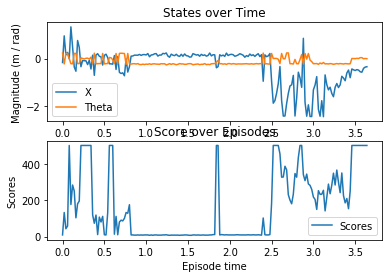

In [6]:
%run -i my_policy_gradient

###### Figure description
The graph (top) above plots the states of the system as it learns. The X-axis denotes the time while the Y axis denotes the magnitude of the states in Radians and Meters respectively for Theta and X.
The second graph (below) above plots the score (Y axis) of each episode against the corresponding time (X axis).

It can be observed from the graph (lower) above that solution is reached after consequetive mean high scores for 10 episodes  ~ 0.2 seconds. The corresponding graph (above) shows that the state of interest i.e theta has reached equilibrium tracing the trend of the score.

#### 3.1 Deep Q Network
This section will focus more on the setup of deep Q network used and the observations of this implemention than the general theory.

In this section, the reinforcement learning is composed of a **3-layer neural network with relu activation** function with state as the input and **Q Value of each action is output of network**. It was ensured that the Q value is **normalized** so the model maintained the loss function to be **cross-entropy** and the optimzer to be **Adam optimizer.**

The DQN can be treated as a **multi-layer convolutional network**. It utilizes a optimal or target model/ network, to calculate Q-values for updates. Each training memory is filled by taking a predetermined number of random actions. The **size of the mini-batch is selected randomly** for each training. During every training, the network predicts a model using this mini-batch which includes a history of states, rewards and actions. The discount function is calculated with a **discount_factor=0.99**. The noise added to the reward is the target reward for the particular action. **Epsilon greedy** policy is used to choose from this set of available actions for each episode. The **epsilon is initilized at 1**. The **epsilon_decay is 0.999** with the **epsilon minimum value as 0.01**. The strategy is to follow a procedure to **Armijo Line Search on epsilon** to find an optimal action within an episode.

An episode had no limits on its number of iterations. It ran till a done flag was set. The done flag was raised either when the system 'stabilized' or if it completely disrupted. A total of **500 episodes** are a part of single training exercise. Here, 'stabilized' was defined as the state maintaining a value within the specified tolerence over a specified time interval.

For the Neural Network, the **learning_rate is 10^-3 with no momentum** and the length of all hidden layers is 24. The DQN was purposely constructed to be as similar to the policy gradient network so as to enable comparisions.

**Observations:** The learning was provided with a random initial condition between 0.1 to -0.1 radians for theta and 0.1 to -0.1 for cart position. The learning trend in this particular technique seems to be gradually and generally (not monotonically) increasing . One can even go to a length and claim that the change in the states can be proportional to the slope of change in the scores curve. This bold claim can be observed from the end of the graphs from time=1.8 secs onwards. I hypothesize that these trends can be attributed to the fact that the **Deep Q Network was trained off the model derived from the policy gradient instead of the purely dynamical model**.

**Measuring Performance: Miclassifications - **
Here, one can also argue that the **progress of states** (given its observed relation to the loss function) over each episode can be considered as the number of misclassifications, for they show comparision to the inverted equilibrium state of value of 0 over every iteration.

Found solution


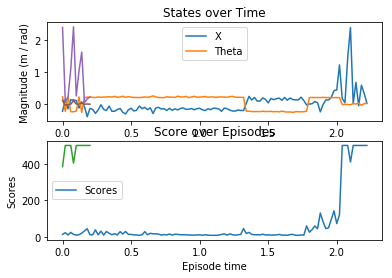

In [9]:
%run -i my_dqn

###### Figure description
The graph (top) above plots the states of the system as it learns. The X-axis denotes the time while the Y axis denotes the magnitude of the states in Radians and Meters respectively for Theta and X.
The second graph (below) above plots the score (Y axis) of each episode against the corresponding time (X axis).

It can be observed from the graph (lower) above that solution is reached after consequetive mean high scores for 10 episodes  ~ 0.2 seconds. The corresponding graph (above) shows that the state of interest i.e theta has reached equilibrium tracing the trend of the score.

#### 4.1 Technique Comparision
**Policy Gradient**
1. Stochastic policy 
2. Exploration algorithm
3. Uncertainty might teach wrong policy or worsen it.
4. For continuous as well discrete states and actions.
5. Learning performance is often increased.
6. Convergence is guaranteed.

**DQN**
1. Follows given optimal policy 
2. Strong Learning algorithm
3. Environment policy is deterministic
4. Only for discrete states and actions.
5. The loss does not always decrease because learning may alter target labels.
6. Q-value Convergence is not guaranteed for it depends on optimal policy chosen.


#### 4.2 Conclusion
When learning a new dynamical system or for robot skill learning, the policy gradient works the best. However, to force a discrete dynamical system to follow a predetermined agent, the Deep Q Network is a better choice. 

#### 5.1 References
###### Code References
1. Woongwon, Youngmoo, Hyeokreal, Uiryeong, Keon, "Minimal and Clean Reinforcement Learning Examples", (2017 commit), Github Repository , https://github.com/rlcode/reinforcement-learning
2. Giuseppe Bonaccorso, "cartpole.py" (2016), Github Code , https://gist.github.com/giuseppebonaccorso/7040b10a13520c4b0340b8a89dc8262f
3. Henry Jia, "OpenAI gym cartpole" (2016), Github Repository, https://github.com/HenryJia/cartpole
4. Abhishek Mishra, "pg_rnn" (2017), Github Repository, https://github.com/abhishm/pg_rnn 